In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## 载入数据

In [33]:
data = pd.read_csv("../data/watermelon.csv")
data.columns = ["id", "density", "sugar", "good"]
data = data[["density", "sugar", "good"]]
data.head()

,density,sugar,good
0,0.697,0.460,是
1,0.774,0.376,是
2,0.634,0.264,是
3,0.608,0.318,是
4,0.556,0.215,是


In [34]:
data['good'] = data['good'].apply(lambda x: 1 if x == '是' else 0)
data.head()

,density,sugar,good
0,0.697,0.460,1
1,0.774,0.376,1
2,0.634,0.264,1
3,0.608,0.318,1
4,0.556,0.215,1


In [35]:
X = data.values[:, :2]
y = data.values[:, 2]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.05, random_state=42)

## 建立模型

### 3个基分类器

In [140]:
clf3 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                          n_estimators=3, learning_rate=0.5, random_state=42)
clf3.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=1,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                          

In [141]:
# 训练集
y_train_pred = clf3.predict(X_train)
print(classification_report(y_train, y_train_pred))

              precision    recall  f1-score   support

         0.0       0.90      1.00      0.95         9
         1.0       1.00      0.86      0.92         7

    accuracy                           0.94        16
   macro avg       0.95      0.93      0.94        16
weighted avg       0.94      0.94      0.94        16



In [142]:
# 测试集
y_pred = clf3.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



下面的做图函数参考[官方文档](https://scikit-learn.org/stable/auto_examples/ensemble/plot_adaboost_twoclass.html#sphx-glr-auto-examples-ensemble-plot-adaboost-twoclass-py)

In [143]:
def counterPlot(X, y, clf):
    plot_colors = "br"
    plot_step = 0.02
    class_names = "01"

    plt.figure(figsize=(10, 5))

    # Plot the decision boundaries
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    plt.axis("tight")
    # Plot the training points
    for i, n, c in zip(range(2), class_names, plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1],
                    c=c, cmap=plt.cm.Paired,
                    s=20, edgecolor='k',
                    label="Class %s" % n)
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)
    plt.legend(loc='upper right')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Decision Boundary')
    
    plt.show()

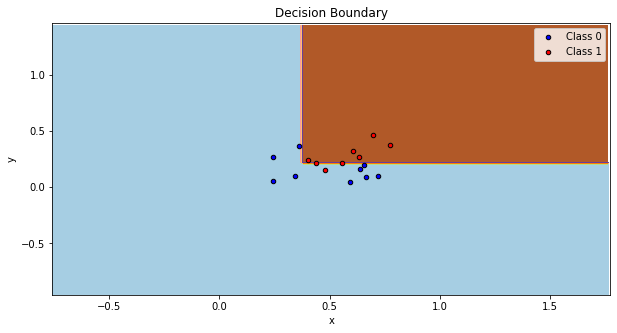

In [144]:
counterPlot(X, y, clf3)

### 5个基分类器

In [133]:
clf5 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                          n_estimators=5, learning_rate=0.5, random_state=42)
clf5.fit(X_train, y_train)
# 训练集
print("Training data: ")
y_train_pred = clf5.predict(X_train)
print(classification_report(y_train, y_train_pred))
# 测试集
print("Test data: ")
y_pred = clf5.predict(X_test)
print(classification_report(y_test, y_pred))

Training data: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Test data: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



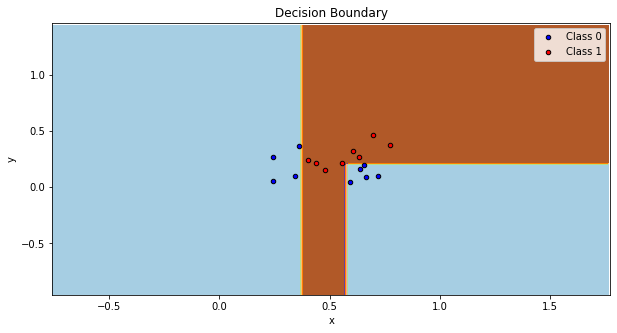

In [134]:
counterPlot(X, y, clf5)

### 11个基分类器

In [131]:
clf11 = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1), 
                          n_estimators=11, learning_rate=0.5, random_state=42)
clf11.fit(X_train, y_train)
# 训练集
print("Training data: ")
y_train_pred = clf11.predict(X_train)
print(classification_report(y_train, y_train_pred))
# 测试集
print("Test data: ")
y_pred = clf5.predict(X_test)
print(classification_report(y_test, y_pred))

Training data: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         9
         1.0       1.00      1.00      1.00         7

    accuracy                           1.00        16
   macro avg       1.00      1.00      1.00        16
weighted avg       1.00      1.00      1.00        16

Test data: 
              precision    recall  f1-score   support

         1.0       1.00      1.00      1.00         1

    accuracy                           1.00         1
   macro avg       1.00      1.00      1.00         1
weighted avg       1.00      1.00      1.00         1



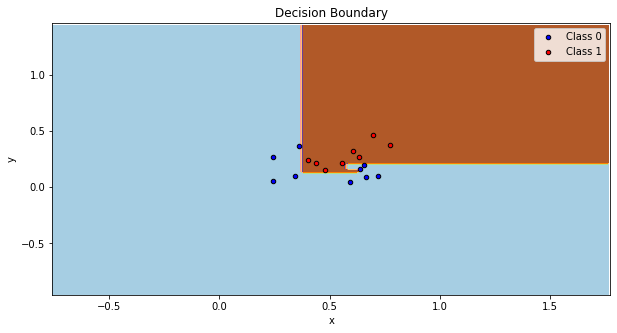

In [132]:
counterPlot(X, y, clf11)